## TUGAS 1 - ENERGY EFFICIENCY DATASET

### Tentang Dataset :
Dataset Energy Efficiency Dataset berisi analisis energi menggunakan 12 bentuk bangunan yang berbeda yang disimulasikan di Ecotect. Bangunan-bangunan tersebut berbeda dalam hal luas kaca, distribusi luas kaca, dan orientasi, di antara parameter-parameter lainnya. Kami mensimulasikan berbagai pengaturan sebagai fungsi dari karakteristik-karakteristik yang disebutkan sebelumnya untuk mendapatkan 768 bentuk bangunan. Dataset ini terdiri dari 768 sampel dan 8 variabel, dengan tujuan memprediksi dua value, yakni heating load dan cooling load. Hal ini juga dapat digunakan sebagai masalah klasifikasi multi-kelas jika valuenya dibulatkan ke bilangan bulat terdekat.


Dataset ini mengandung delapan kolom (atau variabel, ditandai dengan X1...X8) dan dua respons (atau hasil, ditandai dengan y1 dan y2). Tujuannya adalah menggunakan delapan variabel tersebut untuk memprediksi masing-masing dari dua respons tersebut.

#### Kolom pada Dataset :
- X1 : Relative Compactness
- X2 : Surface Area
- X3 : Wall Area
- X4 : Roof Area
- X5 : Overall Height
- X6 : Orientation
- X7 : Glazing Area
- X8 : Glazing Area Distribution
- y1 : Heating Load
- y2 : Cooling Load

#### Variabel Target : y1 (Heating load) dan y2 (Cooling load)




### Import Library

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

### Membaca Dataset

In [31]:
data = pd.read_csv("input/energyEfficiency.csv")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Memberikan Nama Untuk Setiap Kolom

In [32]:
data.rename(columns={
    "X1": "Relative Compactness",
    "X2": "Surface Area",
    "X3": "Wall Area",
    "X4": "Roof Area",
    "X5": "Overall Height",
    "X6": "Orientation",
    "X7": "Glazing Area",
    "X8": "Glazing Area Distribution",
    "Y1": "Heating Load",
    "Y2": "Cooling Load"
}, inplace=True)


### Menampilkan Info dari Dataset

In [33]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Cek Apakah Ada Data yang Hilang atau Tidak

In [34]:
data.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

### Menghitung jumlah nilai yang bervariasi pada setiap kolom dalam dataset

In [35]:
data.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 586
Cooling Load                 636
dtype: int64

In [36]:
data[data["Glazing Area"]==0].describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.0,48.000000,48.000000
mean,0.764167,671.708333,318.500000,176.604167,5.250000,3.500000,0.0,0.0,14.286458,19.706250
std,0.106827,88.960297,44.059438,45.614184,1.768519,1.129865,0.0,0.0,7.625241,8.134356
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.0,0.0,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.500000,2.750000,0.0,0.0,7.037500,12.047500
50%,0.750000,673.750000,318.500000,183.750000,5.250000,3.500000,0.0,0.0,13.200000,18.980000
75%,0.830000,741.125000,343.000000,220.500000,7.000000,4.250000,0.0,0.0,19.747500,25.860000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.0,0.0,29.900000,39.440000


Pada data di atas dapat dilihat bahwa ada 48 rumah tanpa jendela

### Visualisasi Setiap Variabel ke dalam Diagram Batang

In [37]:
def Hist_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a box plot of all the specified features."""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]
        
        sns.histplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Hist Plot of {feat!r}")

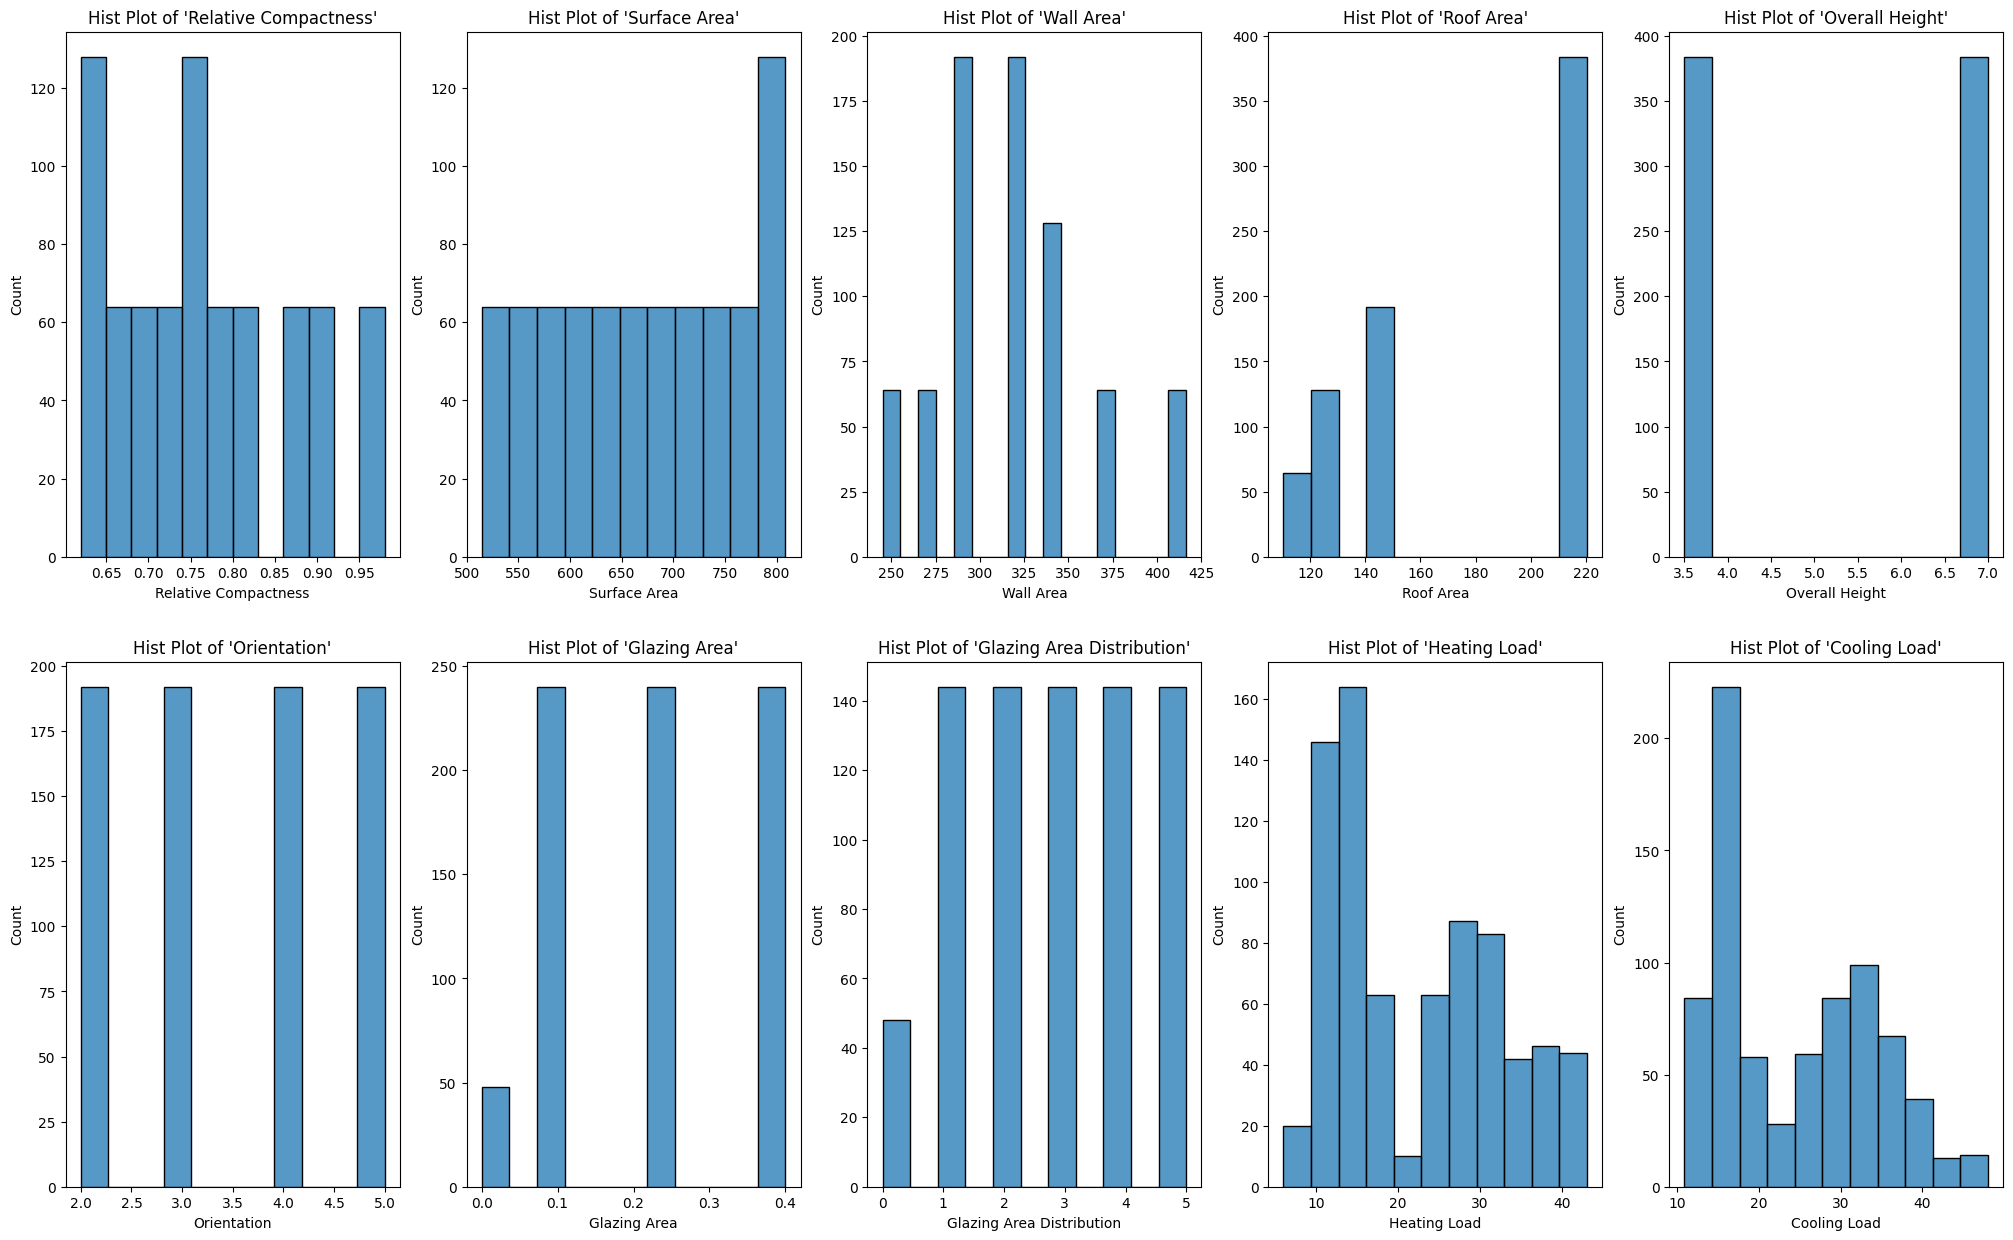

In [38]:
Hist_plots(data=data,features=data.columns,n_rows=2, n_cols=5, figsize=(25,15))

### ANALISIS MULTIVARIABEL

Analisis multivariabel dilakukan untuk melihat bagaimana setiap variabel pada dataset mempengaruhi variabel target (cooling load dan heating load)

#### Analisis Kaitan Tinggi Bangunan dengan Beban Pendinginan dan Pemanasan

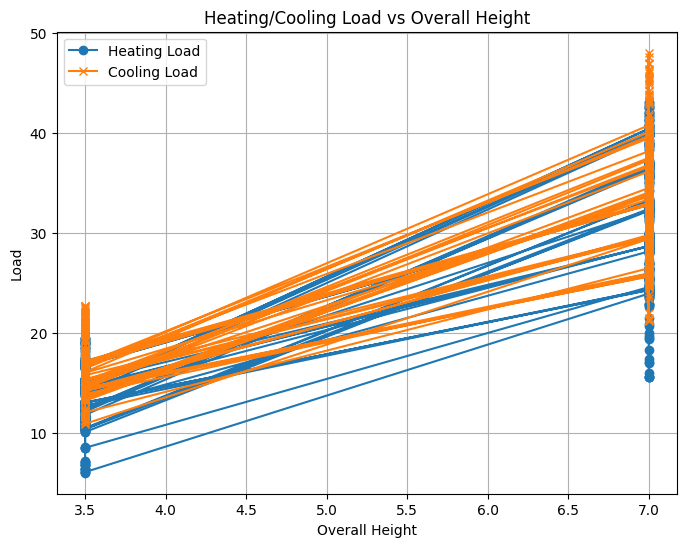

In [39]:
plt.figure(figsize=(8, 6))

plt.plot(data['Overall Height'], data['Heating Load'], label='Heating Load', marker='o')
plt.plot(data['Overall Height'], data['Cooling Load'], label='Cooling Load', marker='x')

plt.title('Heating/Cooling Load vs Overall Height')
plt.xlabel('Overall Height')
plt.ylabel('Load')
plt.legend()
plt.grid(True)

plt.show()


Lineplot di atas menunjukkan bahwa bangunan yang lebih tinggi membutuhkan pendinginan atau pemanasan lebih dibandingkan bangunan yang lebih pendek.

#### Analisis Kaitan Orientasi Bangunan dengan Beban Pendinginan dan Pemanasan

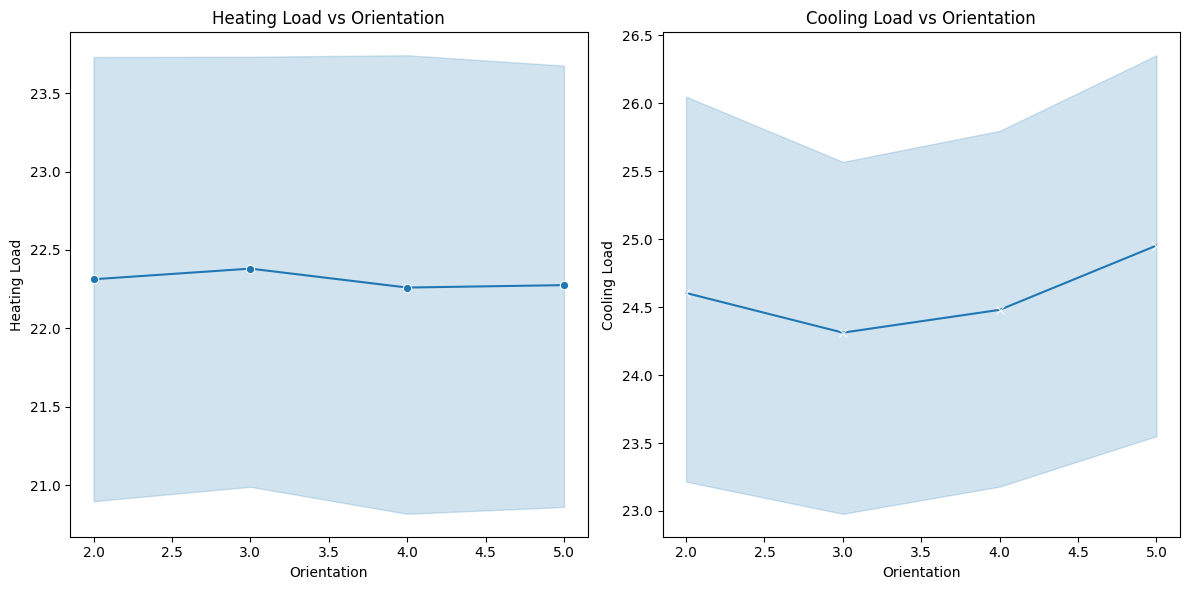

In [40]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=data, x='Orientation', y='Heating Load', marker='o')
plt.title('Heating Load vs Orientation')
plt.xlabel('Orientation')
plt.ylabel('Heating Load')

plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Orientation', y='Cooling Load', marker='x')
plt.title('Cooling Load vs Orientation')
plt.xlabel('Orientation')
plt.ylabel('Cooling Load')

plt.tight_layout()
plt.show()


Lineplot di atas menunjukkan bahwa orientasi bangunan tidak berpengaruh terhadap beban pendinginan atau pemanasan. Oleh karena itu, kolom "Orientation" bisa dihapus/drop

In [41]:
data.drop("Orientation", axis=1, inplace=True)

#### Analisis Kaitan Glazing Area dengan Beban Pendinginan dan Pemanasan

"Glazing area" adalah bagian dari bangunan yang tertutup kaca atau bahan transparan lainnya, seperti jendela atau pintu dari bangunan tersebut.

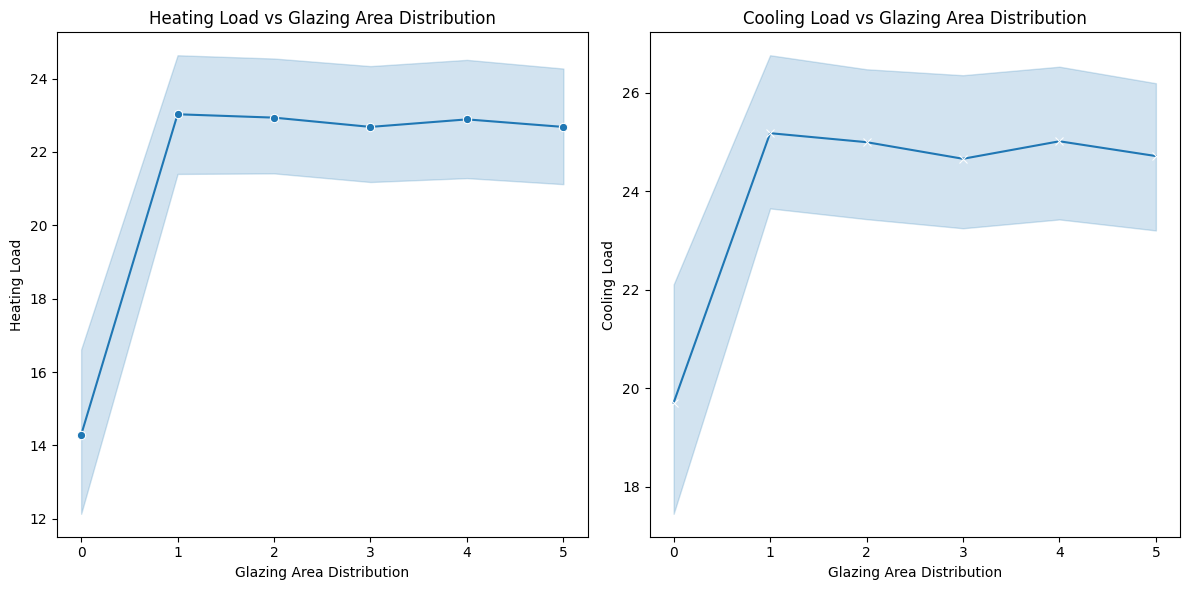

In [42]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=data, x='Glazing Area Distribution', y='Heating Load', marker='o')
plt.title('Heating Load vs Glazing Area Distribution')
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Heating Load')

plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Glazing Area Distribution', y='Cooling Load', marker='x')
plt.title('Cooling Load vs Glazing Area Distribution')
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Cooling Load')

plt.tight_layout()
plt.show()


Plot menunjukkan bahwa terdapat pengaruh yang signifikan terhadap beban pemanasan dan pendinginan saat Glazing Area Distribution >= 0. Hal ini menunjukkan bahwa keberadaan atau tidak adanya distribusi area kaca (Glazing Area Distribution) memiliki dampak yang terlihat pada beban pemanasan dan pendinginan dalam bangunan.

Untuk mengurangi kompleksitas, serta untuk highlight pengaruh yang signifikan, Glazing Area Distribution akan dibagi menjadi dua kategori, dimana :
- Nilai-nilai yang kurang dari atau sama dengan 0 akan diberi nilai 0,
- sementara nilai-nilai yang lebih besar dari 0 akan diberi nilai 1.

Hal ini akan menyederhanakan representasi dari fitur tersebut sehingga dapat lebih mudah dianalisis, dan juga dapat men-highlight pengaruh penting dari keberadaan atau tidak adanya glazing area terhadap beban pemanasan dan pendinginan dalam bangunan.

In [43]:
data["Glazing Area Distribution"].replace({0:0,1:1,2:1,3:1,4:1,5:1}, inplace=True)

Hasil penyederhanaan dapat dilihat pada lineplot berikut :

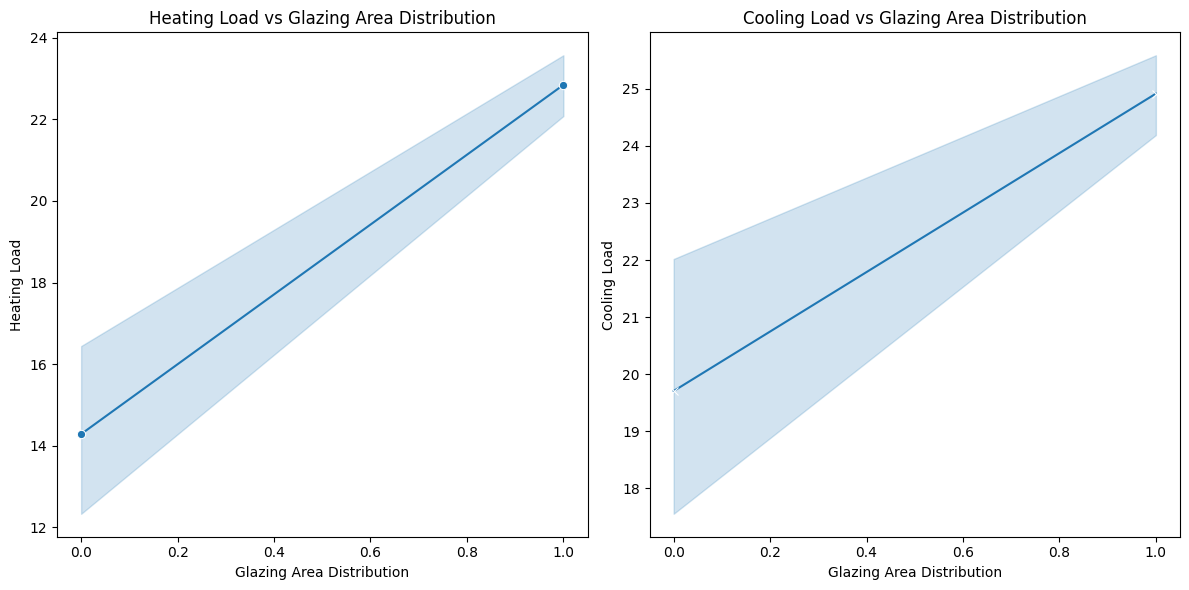

In [44]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=data, x='Glazing Area Distribution', y='Heating Load', marker='o')
plt.title('Heating Load vs Glazing Area Distribution')
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Heating Load')

plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Glazing Area Distribution', y='Cooling Load', marker='x')
plt.title('Cooling Load vs Glazing Area Distribution')
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Cooling Load')

plt.tight_layout()
plt.show()

### Mencari Korelasi dari Setiap Variabel dalam Dataset

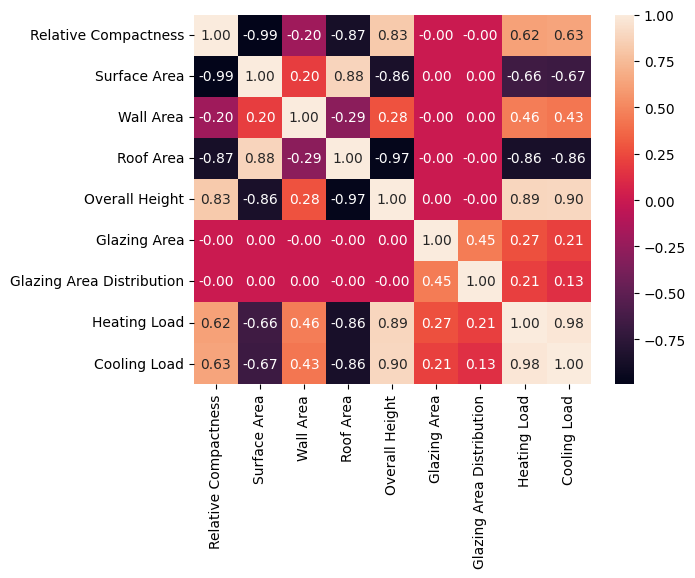

In [45]:
corr=data.corr(method = 'pearson')
corr

sns.heatmap(corr, annot=True,fmt=".2f");

Berdasarkan heatmap di atas, terdapat beberapa observasi penting terkait hubungan antara fitur (features) dan variabel target dalam dataset:

### Hubungan antara Variabel dan Variabel Target:

1. **Variabel yang Berkorelasi dengan Variabel Target**:
    - **Roof Area** memiliki korelasi negatif yang kuat dengan variabel target.
    - **Overall Height** memiliki korelasi positif yang kuat dengan variabel target.
    - **Surface Area** memiliki korelasi sedikit negatif dengan variabel target.


2. **Variabel dengan Korelasi Rendah terhadap Variabel Target**:
    - **Orientation**, **Wall Area**, **Glazing Area**, dan **Glazing Area Distribution** memiliki korelasi yang sangat rendah dengan variabel target.

### Hubungan antara Variabel:

1. **Korelasi Tinggi antara Variabel-Variabel Tertentu**:
    - **Surface Area** dan **Relative Compactness** memiliki korelasi negatif yang sangat tinggi (sebesar -0.99), menunjukkan keterkaitan yang kuat di antara keduanya. Ini menandakan bahwa ketika salah satu meningkat, yang lain cenderung menurun secara signifikan.

2. **Korelasi Rendah antara Variabel-Variabel Lain**:
    - **Wall Area** memiliki korelasi rendah dengan fitur-fitur lain dalam dataset.

3. **Korelasi Nol atau Dekat dengan Nol**:
    - **Orientation** memiliki korelasi yang mendekati nol atau sama dengan nol terhadap fitur-fitur lainnya, menunjukkan bahwa fitur ini tidak memiliki korelasi yang kuat dengan fitur lain dalam dataset.

### Hubungan antara Variabel Target:

1. **Korelasi Tinggi antara Variabel Target**:
    - **Cooling Load** dan **Heating Load** memiliki korelasi yang tinggi, menunjukkan adanya keterkaitan yang kuat antara kedua variabel target ini.

### Menghapus Variabel "Surface Area"

Variabel "Surface Area" dihapus karena korelasinya yang lebih tinggi dengan fitur lain dalam dataset, terutama dibandingkan dengan fitur "Relative Compactness". Hal ini dilakukan untuk menghindari masalah collinearity atau multikolinearitas.

In [46]:
data.drop("Surface Area", inplace=True, axis=1)

### Analisis Data dan Pembangunan Model Untuk Regresi

Karena variabel target memiliki distribusi yang hampir sama seperti yang diamati dari statistik deskriptif, hanya satu dari variabel target akan digunakan untuk pemodelan.

Dalam proses pemodelan, dataset  dibagi menjadi dua jenis data:

1. Data Training: bagian dari dataset yang digunakan untuk melatih atau mengembangkan model. Model menggunakan data training ini untuk memahami pola dan hubungan di dalam dataset. Variabel independen (fitur) dan variabel target digunakan bersama untuk melatih model.

2. Data Testing: bagian lain dari dataset yang tidak digunakan saat pelatihan model. Data testing ini digunakan untuk menguji performa model yang telah dilatih dengan data training. Tujuannya adalah untuk mengevaluasi seberapa baik model mampu melakukan prediksi atau generalisasi pada data yang belum pernah dilihat sebelumnya.

In [47]:
TEST_SIZE=0.2
RANDOM_STATE=42
X=data.drop(["Heating Load", "Cooling Load"], axis=1)
y=data["Cooling Load"]

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

#### (Scaling) fitur-fitur numerik untuk memiliki skala yang sama di seluruh fitur-fitur tersebut.

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       614 non-null    float64
 1   Wall Area                  614 non-null    float64
 2   Roof Area                  614 non-null    float64
 3   Overall Height             614 non-null    float64
 4   Glazing Area               614 non-null    float64
 5   Glazing Area Distribution  614 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 33.6 KB


In [49]:
var_to_scale=X_train.select_dtypes(include=["float64", "int64"]).columns

In [50]:
scaler = MinMaxScaler()

col_transformer = ColumnTransformer(
    transformers=[ ("scaler", scaler, var_to_scale)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', MinMaxScaler(),
                                 Index(['Relative Compactness', 'Wall Area', 'Roof Area', 'Overall Height',
       'Glazing Area', 'Glazing Area Distribution'],
      dtype='object'))])

In [51]:
X_train_trans=col_transformer.fit_transform(X_train) 
X_test_trans=col_transformer.transform(X_test)   

In [52]:
df_train_trans=pd.DataFrame(data=X_train_trans, columns=X_train.columns)
df_train_trans

,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
0,0.555556,0.428571,0.333333,1.0,0.250,1.0
1,0.055556,0.571429,1.000000,0.0,1.000,1.0
2,0.666667,0.285714,0.333333,1.0,0.625,1.0
3,0.777778,0.428571,0.111111,1.0,0.625,1.0
4,0.111111,0.428571,1.000000,0.0,0.250,1.0
...,...,...,...,...,...,...
609,0.388889,1.000000,0.111111,1.0,0.250,1.0
610,0.666667,0.285714,0.333333,1.0,0.250,1.0
611,0.250000,0.142857,1.000000,0.0,0.250,1.0
612,1.000000,0.285714,0.000000,1.0,0.625,1.0


### Membuat Model Prediksi Menggunakan Regresi

#### Menentukan Algoritma Prediksi dengan Kinerja Terbaik

In [53]:
def train_and_evaluate_models(X_train,X_test, y_train, y_test):
    models = [
        ("Linear Regression", LinearRegression()),
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor()),
        ("SVM", SVR()),  
        ("XGBoost", XGBRegressor()),
        ("K-Nearest Neighbors", KNeighborsRegressor())
    ]
    model_names = []
    mse_values = []
    mae_values = []
    rmse_values=[]
    r2_values = []
    
    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse=mean_squared_error(y_test, y_pred)
        mae=mean_absolute_error(y_test, y_pred)
        rmse=mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        model_names.append(model_name)
        mse_values.append(mse)
        mae_values.append(mae)
        rmse_values.append(rmse)
        r2_values.append(r2)
        
        
    metrics_df=pd.DataFrame({
            'Model': model_names,
            'Mean Absolute Error': mae_values,
            'Root Mean Squared Error': rmse_values,
            'Mean Squared Error': mse_values,
            'R-squared (R2)': r2_values
        })
    return metrics_df

In [54]:
train_and_evaluate_models(X_train,X_test,y_train, y_test)

,Model,Mean Absolute Error,Root Mean Squared Error,Mean Squared Error,R-squared (R2)
0,Linear Regression,2.187545,3.106592,9.650917,0.895843
1,Decision Tree,1.165358,1.748119,3.055920,0.967019
2,Random Forest,1.174716,1.753979,3.076443,0.966798
3,SVM,3.350358,4.650678,21.628810,0.766572
4,XGBoost,1.165082,1.747994,3.055482,0.967024
5,K-Nearest Neighbors,1.269883,2.046523,4.188258,0.954798


In [55]:
train_and_evaluate_models(X_train_trans,X_test_trans,y_train, y_test)

,Model,Mean Absolute Error,Root Mean Squared Error,Mean Squared Error,R-squared (R2)
0,Linear Regression,2.187545,3.106592,9.650917,0.895843
1,Decision Tree,1.165358,1.748119,3.055920,0.967019
2,Random Forest,1.169020,1.749979,3.062428,0.966949
3,SVM,1.901710,3.120086,9.734940,0.894936
4,XGBoost,1.165082,1.747994,3.055482,0.967024
5,K-Nearest Neighbors,1.292195,2.141539,4.586189,0.950504


Berdasarkan data di atas, dapat dilihat bahwa algoritma terbaik yang bisa digunakan adalah 
1. Decision Tre
2. Random Forest
3. XGBoost, 

karena ketiga algoritma ini menunjukkan Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan Mean Squared Error (MSE) yang lebih rendah, bersama dengan nilai R-squared (R2) yang lebih tinggi, menunjukkan kinerja prediktif yang kuat pada dataset.

Oleh karena itu, prediksi akan menggunakan ketiga algoritma tersebut

#### Mengimplementasikan beberapa model regresi (Decision Tree Regressor, Random Forest Regressor, dan XGBoost Regressor). Tujuannya adalah untuk melatih model-model regresi pada data yang direpresentasikan oleh variabel X sebagai fitur dan y sebagai target.

In [56]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)


dt_feature_importance = dt_model.feature_importances_


rf_model = RandomForestRegressor()
rf_model.fit(X, y)


rf_feature_importance = rf_model.feature_importances_


xgb_model = XGBRegressor()
xgb_model.fit(X, y)


xgb_feature_importance = xgb_model.feature_importances_

##### Membuat DataFrame yang menampilkan nilai feature importance dari beberapa model (Decision Tree Regressor, Random Forest Regressor, dan XGBoost Regressor) dalam bentuk tabel 

In [57]:
feat_import=pd.DataFrame(columns=X_train.columns, data=[dt_feature_importance,rf_feature_importance,xgb_feature_importance],index=["Decision Tree", "Random forest", "Xgboost"])
feat_import

,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
Decision Tree,0.859197,0.086668,0.003805,0.000000,0.047330,0.003001
Random forest,0.548586,0.082779,0.078150,0.238222,0.048792,0.003472
Xgboost,0.885257,0.049188,0.000000,0.000000,0.065555,0.000000


##### Membuat Visualisasi Hasil Prediksi yang telah Dilakukan menggunakan 3 Algoritma di atas

C:\Users\kekop\AppData\Local\Temp\ipykernel_31044\2787670303.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feat_import[i], x=X_train.columns, ax=ax[i], palette=palettes[i])
C:\Users\kekop\AppData\Local\Temp\ipykernel_31044\2787670303.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feat_import[i], x=X_train.columns, ax=ax[i], palette=palettes[i])
C:\Users\kekop\AppData\Local\Temp\ipykernel_31044\2787670303.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feat_import[i], x=X_train.columns, ax=ax[i], palette=palettes[i])


<Figure size 1500x1000 with 0 Axes>

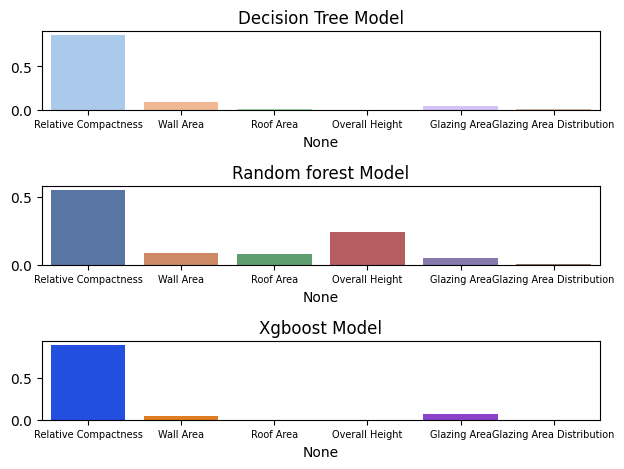

In [58]:
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(nrows=3, ncols=1)
models = ["Decision Tree", "Random forest", "Xgboost"]
feat_import = [dt_feature_importance, rf_feature_importance, xgb_feature_importance]
palettes = ['pastel', 'deep', 'bright']

for i, model in enumerate(models):
    sns.barplot(y=feat_import[i], x=X_train.columns, ax=ax[i], palette=palettes[i])
    ax[i].set_title(f"{model} Model")
    ax[i].tick_params(axis='x', labelsize=7)

plt.tight_layout()
plt.show()
